## Vectors
### Definition
A vector is a quantity defined by a magnitude and a direction. For example, a rocket's velocity is a 3-dimensional vector: its magnitude is the speed of the rocket, and its direction is (hopefully) up. A vector can be represented by an array of numbers called *scalars*. Each scalar corresponds to the magnitude of the vector with regards to each dimension.

For example, say the rocket is going up at a slight angle: it has a vertical speed of 5,000 m/s, and also a slight speed towards the East at 10 m/s, and a slight speed towards the North at 50 m/s. The rocket's velocity may be represented by the following vector:

**velocity** $= \begin{pmatrix}
45 \\
57 \\
6000 \\
\end{pmatrix}$

Note: by convention vectors are generally presented in the form of columns. Also, vector names are generally lowercase to distinguish them from matrices (which we will discuss below) and in bold (when possible) to distinguish them from simple scalar values such as ${meters\_per\_second} = 5026$.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent to represent vectors as simple points instead of arrows. A vector with 1 element may be represented as an arrow or a point on an axis, a vector with 2 elements is an arrow or a point on a plane, a vector with 3 elements is an arrow or point in space, and a vector with N elements is an arrow or a point in an N-dimensional space… which most people find hard to imagine.


###  Purpose
Vectors have many purposes in Machine Learning, most notably to represent observations and predictions. For example, say we built a Machine Learning system to classify videos into 3 categories (good, spam, clickbait) based on what we know about them. For each video, we would have a vector representing what we know about it, such as:

**video** $= \begin{pmatrix}
15.5 \\
6.2 \\
3.25 \\
8.0
\end{pmatrix}$

This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning.

Based on this vector our Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is clickbait, and 2% that it is a good video. This could be represented as the following vector:

**class_probabilities** $= \begin{pmatrix}
0.67 \\
0.45 \\
0.8
\end{pmatrix}$

### Vectors in python

In python, we can represente vector using python list of numbers 

In [1]:
[12.5, 3.5, 6.75, 8.0]

[12.5, 3.5, 6.75, 8.0]

In [2]:
import numpy as np

points = np.array([12.5, 3.5, 6.75, 8.0])
points

array([12.5 ,  3.5 ,  6.75,  8.  ])

## Plotting vectors 

To plot vectors we will use matplotlib

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

### 2D vectors

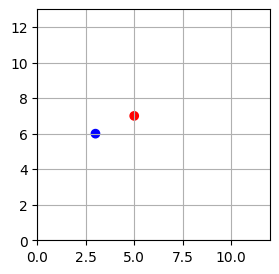

In [9]:
plt.figure(figsize = (3, 3))
u = np.array([5, 7])
v = np.array([3, 6])

x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 12, 0, 13])
plt.grid()
plt.show()

In [10]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

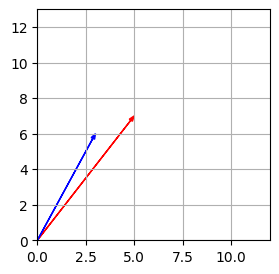

In [12]:
plt.figure(figsize = (3, 3))
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 12, 0, 13])
plt.grid()
plt.show()

### 3D vectors

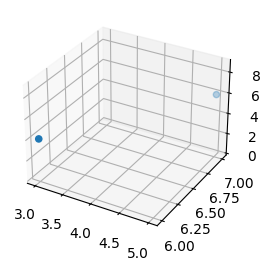

In [14]:
plt.figure(figsize = (3, 3))
u = np.array([5, 7, 6])
v = np.array([3, 6, 4])

from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(u,v)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()



### Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

In [15]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [5 7 6] || =


10.488088481701515

However, it is much more efficient to use NumPy's norm function,

In [16]:
import numpy.linalg as LA

LA.norm(u)

10.488088481701515

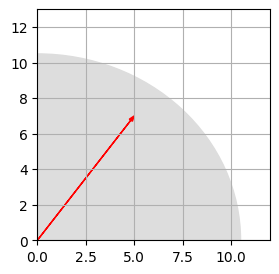

In [18]:
plt.figure(figsize = (3, 3))
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 12, 0, 13])
plt.grid()
plt.show()

### Addition

In [19]:
u + v

array([ 8, 13, 10])

### Plotting Addition

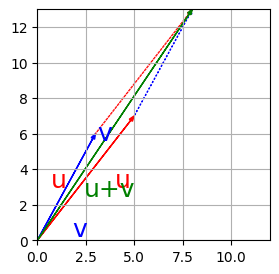

In [21]:
plt.figure(figsize = (3, 3))
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 12, 0, 13])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. You can see it on the previous image: following $\textbf{u}$ *then* $\textbf{v}$ leads to the same point as following $\textbf{v}$ *then* $\textbf{u}$.

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

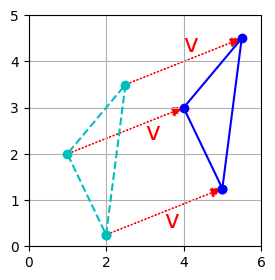

In [24]:
plt.figure(figsize = (3, 3))
u = np.array([2, 5])
v = np.array([3, 1])

t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

### Zero, unit and normalized vectors
* A **zero-vector ** is a vector full of 0s.
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$


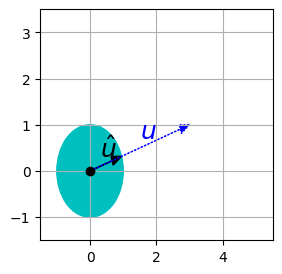

In [25]:
plt.figure(figsize = (3, 3))
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Dot product

### Definition
The dot product (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

In [26]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

### Main properties

* The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
* This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Calculating the angle between vectors
One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [27]:
u = np.array([5, 7])
v = np.array([3, 6])

def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.15660187698201544 radians
      = 8.972626614896399 degrees


### Projecting a point onto an axis
The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


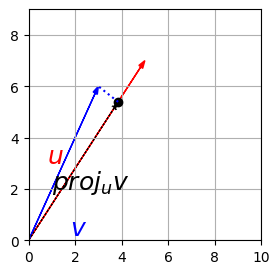

In [31]:
plt.figure(figsize = (3, 3))
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 10, 0, 9])
plt.grid()
plt.show()